In [2]:
# Prerequisites
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  # Clean seaborn style


In [62]:
# Loading a dataset
df_customer = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\customer.csv")
df_album = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\album.csv")
df_artist = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\artist.csv")
df_employee = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\employee.csv")
df_genre = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\genre.csv")
df_invoice = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\invoice.csv")
df_invoice_line = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\invoice_line.csv")
df_media_type = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\media_type.csv")
df_playlist = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\playlist.csv")
df_playlist_track = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\playlist_track.csv")
df_track = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Digital Muasic Store Data Analysis\music store data\music store data\track.csv")

In [47]:
# Check the first few rows of the dataset
df_customer.head()

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5
2,3,François,Tremblay,NaN,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,NaN,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,NaN,Ullevålsveien 14,Oslo,NaN,Norway,171,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,NaN,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [11]:
# Check for missing values
df_customer.isnull().sum()

customer_id        0
first_name         0
last_name          0
company           49
address            0
city               0
state             29
country            0
postal_code        4
phone              1
fax               47
email              0
support_rep_id     0
dtype: int64

In [12]:
# to drop null values
data_clean = df_customer.dropna()

In [13]:
# find duplicates in data
df_employee.duplicated().sum()

0

In [14]:
# to print column headings in Datatable
print(df_invoice.columns)

Index(['invoice_id', 'customer_id', 'invoice_date', 'billing_address',
       'billing_city', 'billing_state', 'billing_country',
       'billing_postal_code', 'total'],
      dtype='object')


In [15]:
df_album.shape

(347, 3)

In [16]:
df_invoice_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_line_id  4757 non-null   int64  
 1   invoice_id       4757 non-null   int64  
 2   track_id         4757 non-null   int64  
 3   unit_price       4757 non-null   float64
 4   quantity         4757 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 185.9 KB


In [17]:
df_invoice.describe()

,invoice_id,customer_id,total
count,614.000000,614.000000,614.000000
mean,307.500000,29.517915,7.670081
std,177.390811,17.095991,4.218043
min,1.000000,1.000000,0.990000
25%,154.250000,14.000000,3.960000
50%,307.500000,30.000000,7.920000
75%,460.750000,44.000000,9.900000
max,614.000000,59.000000,23.760000


C:\Users\Sandhya\AppData\Local\Temp\ipykernel_1520\1748346328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_country.index, y=customer_country.values,palette='magma')


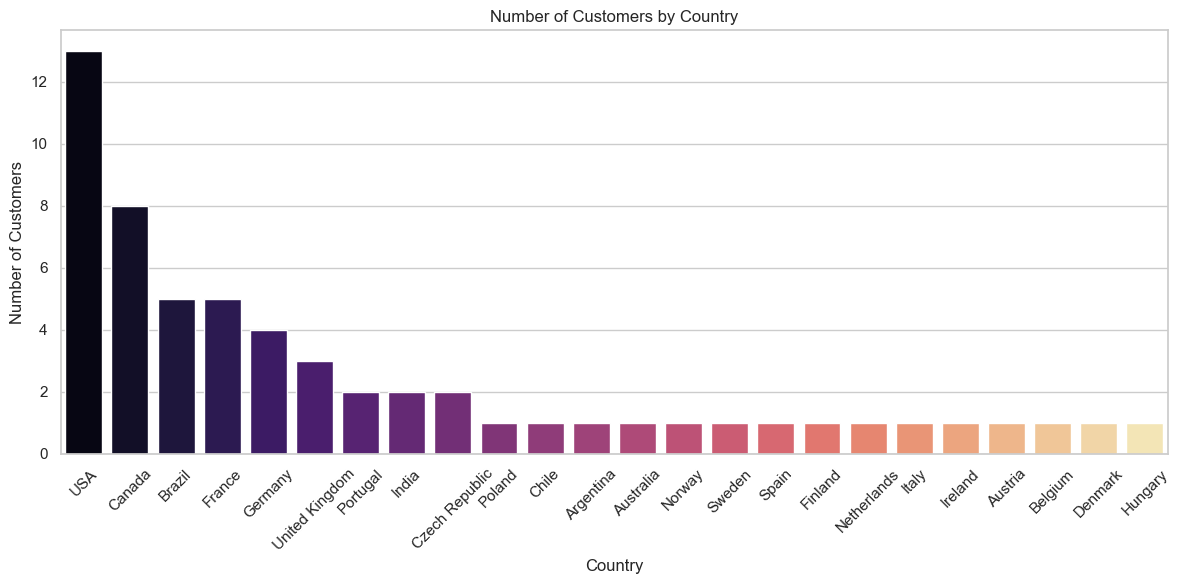

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

customer_country = df_customer['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=customer_country.index, y=customer_country.values,palette='magma')
plt.xticks(rotation=45)
plt.title("Number of Customers by Country")
plt.ylabel("Number of Customers")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

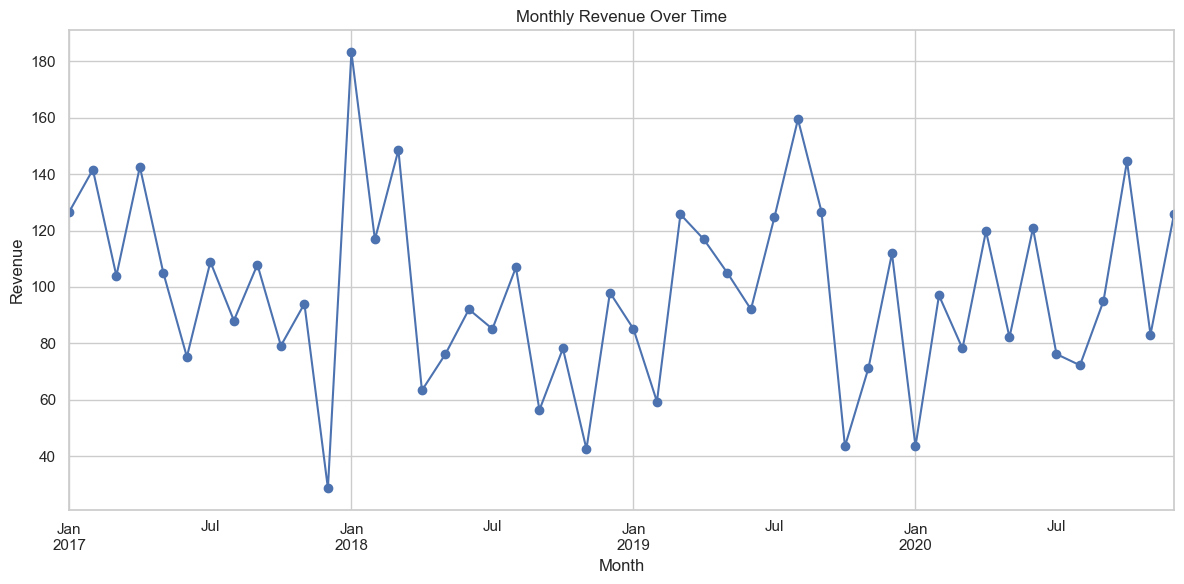

In [27]:
#Monthly Revenue Trend
df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'])
df_invoice['Month'] = df_invoice['invoice_date'].dt.to_period('M')
monthly_revenue = df_invoice.groupby('Month')['total'].sum()

monthly_revenue.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Monthly Revenue Over Time")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

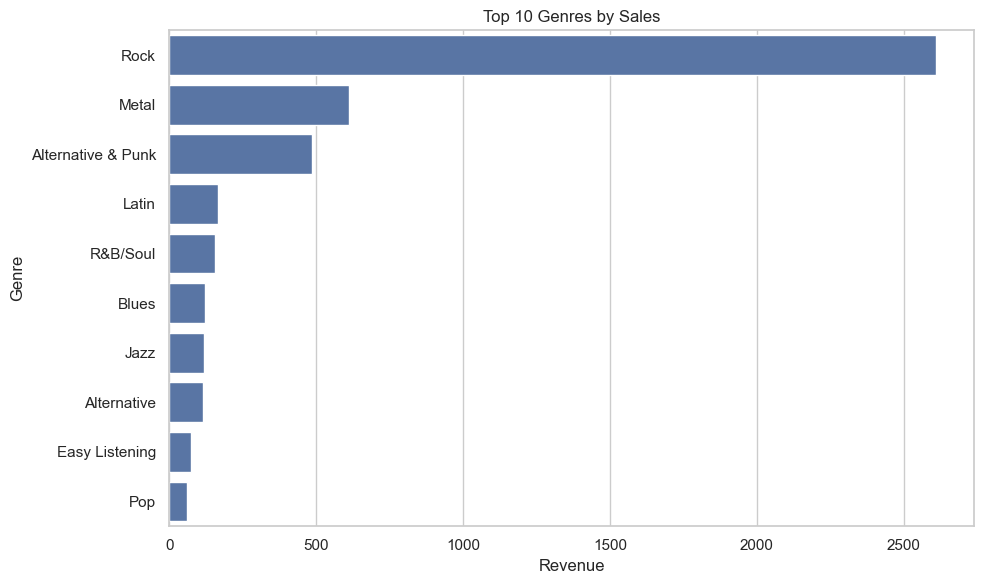

In [63]:
#Top 10 Genres by Sales
track_genre = df_track.merge(df_genre, on='genre_id')
track_sales = df_invoice_line.merge(track_genre, on='track_id')
genre_sales = track_sales.groupby('genre_name')['track_unit_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index,)
plt.title("Top 10 Genres by Sales")
plt.xlabel("Revenue")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


C:\Users\Sandhya\AppData\Local\Temp\ipykernel_1520\3859537357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_track_count.values, y=artist_track_count.index,palette='plasma')


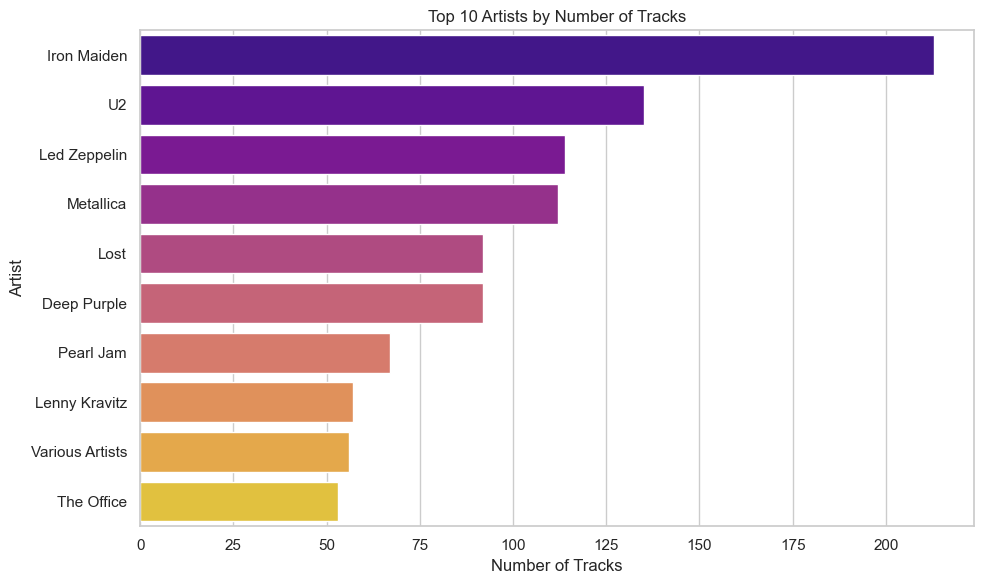

In [69]:
#Artists by Number of Tracks
album_artist = df_album.merge(df_artist, on='artist_id')
track_album_artist = df_track.merge(album_artist, on='album_id')
artist_track_count = track_album_artist['artist_name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=artist_track_count.values, y=artist_track_count.index,palette='plasma')
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


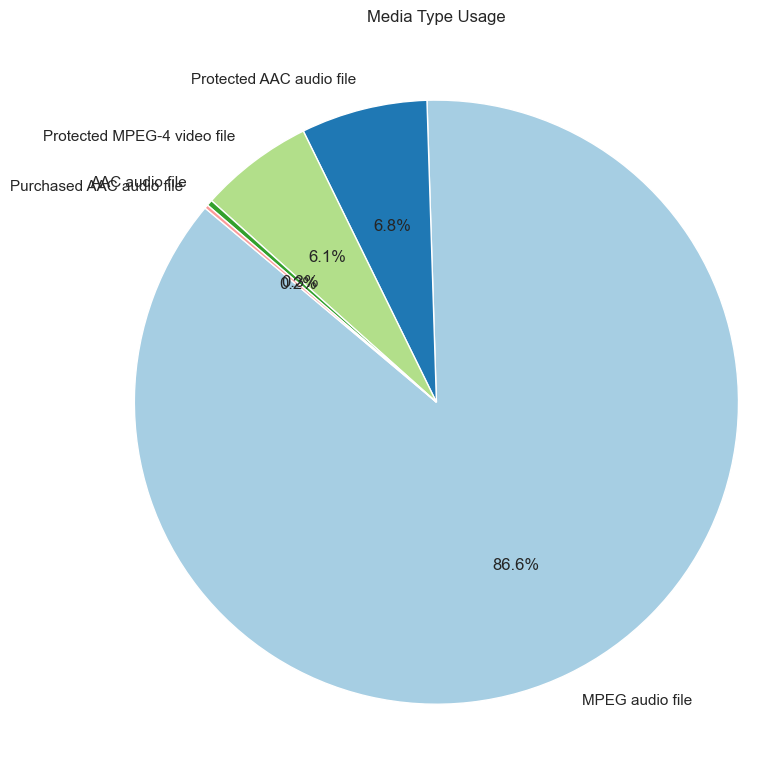

In [65]:
# Media Type Usage as Pie Chart
import matplotlib.pyplot as plt

track_media = df_track.merge(df_media_type, on='media_type_id')
media_usage = track_media['name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    media_usage.values, 
    labels=media_usage.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Media Type Usage")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()


C:\Users\Sandhya\AppData\Local\Temp\ipykernel_1520\2818069919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=track_sales.values, y=track_sales.index, palette='coolwarm')


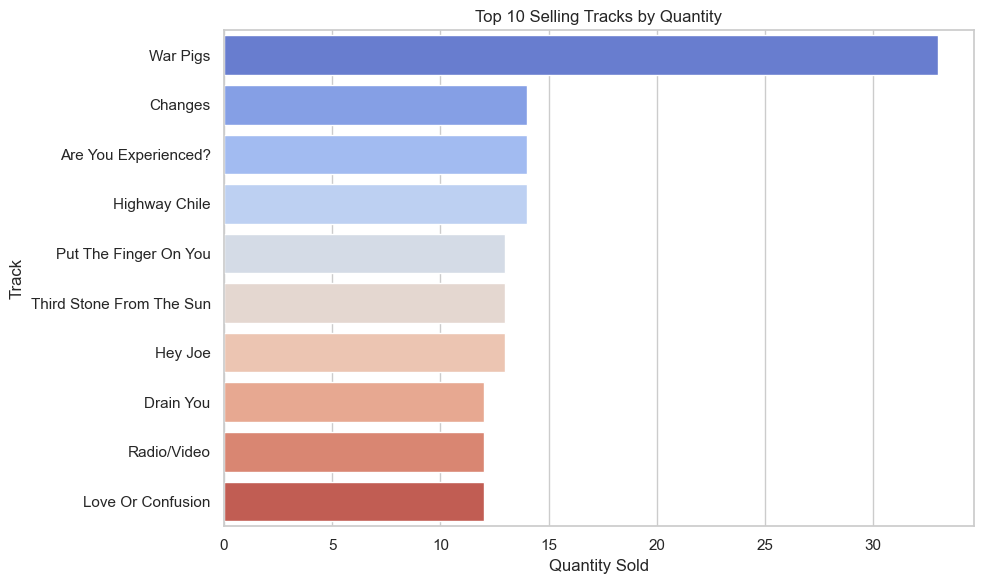

In [71]:
#Top 10 Selling Tracks
top_tracks = df_invoice_line.merge(df_track, on='track_id')
track_sales = top_tracks.groupby('track_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=track_sales.values, y=track_sales.index, palette='coolwarm')
plt.title("Top 10 Selling Tracks by Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Track")
plt.tight_layout()
plt.show()